In [83]:
import MeCab
import re
import copy
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib.font_manager import FontProperties


%matplotlib inline


mecab = MeCab.Tagger ('-d /usr/local/lib/mecab/dic/mecab-ipadic-neologd')
MECAB_FILE_PATH = '../data/neko.txt.mecab'

# 30. 形態素解析結果の読み込み

In [2]:
with open(MECAB_FILE_PATH) as f:
    neko_text = f.read()

In [3]:
neko_text[0:100]

'一\t名詞,数,*,*,*,*,一,イチ,イチ\nEOS\nEOS\n\u3000\t記号,空白,*,*,*,*,\u3000,\u3000,\u3000\n吾輩\t名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ\nは\t助詞,係助詞,*,*,*,'

In [20]:
mecab_pattern = re.compile(r"^(.+)\t(.+),(.+),(.+),(.+),(.+),(.+),(.+),(.+),(.+)$")
eos_pattern = re.compile(r"^EOS$")

res = mecab_pattern.match(neko_text.split("\n")[0])
print(res)
print(res.group(1))
print(res.group(2))
print(res.group(8))

<re.Match object; span=(0, 22), match='一\t名詞,数,*,*,*,*,一,イチ,イチ'>
一
名詞
一


In [21]:
mecabed_text = []
line = []

#mecab_pattern = re.compile(r"(.+)\t(.+),(.+),(.+),(.+),(.+),(.+),(.+),(.+)")
#eos_pattern = re.compile(r"^EOS$")

for txt in neko_text.split("\n"):
    res = mecab_pattern.match(txt)
    if res is not None:
        dic = {
            'surface': res.group(1),
            'base': res.group(8),
            'pos': res.group(2),
            'pos1': res.group(3)
        }
        line.append(dic)
        #print(line)
        
    elif eos_pattern.match(txt) is not None:
        if len(line) > 0:
            mecabed_text.append(line)
        #if len(mecabed_text) % 10 == 0:
        #    print(len(mecabed_text))
        line = []

In [22]:
len(mecabed_text)

9210

In [25]:
mecabed_text[0:5]

[[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}],
 [{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'},
  {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}],
 [{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'},
  {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}],
 [{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'

# 31. 動詞 32. 動詞の原形

In [29]:
verbs = set()

verbs_test = []
for line in mecabed_text:
    for morpheme in line:
        if morpheme['pos'] == '動詞':
            verbs.add(morpheme['base'])
            verbs_test.append(morpheme['base'])
            
print(sorted(verbs, key=verbs_test.index)[:10])

['生れる', 'つく', 'する', '泣く', 'いる', '始める', '見る', '聞く', '捕える', '煮る']


# 33. 「AのB」

In [40]:
for line_number, line in enumerate(mecabed_text):
    for index, morpheme in enumerate(line):
        if morpheme['base'] == 'の' \
            and index - 1 >= 0 and index + 1 < len(line) \
            and line[index - 1]['pos'] == '名詞' and line[index + 1]['pos'] == '名詞':
            
            print(line[index - 1]['surface'] + line[index]['surface'] + line[index + 1]['surface'])
                
            
    if line_number > 10:
        break
            

彼の掌
掌の上
書生の顔


# 34. 名詞の連接

In [45]:
# No. 34
for line_number, line in enumerate(mecabed_text):
    nouns = []
    for index, morpheme in enumerate(line):
        if morpheme['pos'] == '名詞':
            nouns.append(morpheme['surface'])
        else:
            if len(nouns) > 1:
                print("".join(nouns))
            nouns = []
            
    if line_number > 100:
        break

人間中
一番獰悪
時妙
一毛
その後猫
一度
邸内
三毛
書生以外
四五遍
この間おさん
三馬
御台所
まま奥
住家
終日書斎
勉強家
勉強家
勤勉家
二三ページ
主人以外
限り吾輩
朝主人
一番心持
二人
一つ床
一人
最後大変
神経胃弱性
物指
言語同断


# 35. 単語の出現頻度 36. 頻度上位10語

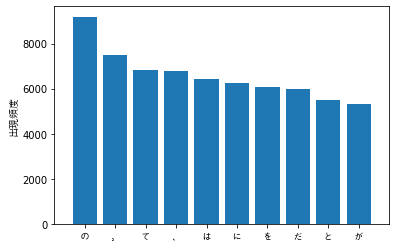

In [101]:
# No.36
words = []
for line_number, line in enumerate(mecabed_text):
    for index, morpheme in enumerate(line):
        words.append(morpheme['base'])
        
def create_chart(words):
    word_counts = pd.Series(words).value_counts()
    words = list(word_counts.index)[0:10]
    counts = list(word_counts)[0:10]
    
    fp = FontProperties(
        fname='/Library/Fonts/AppleGothic.ttf'
    )
    
    plt.bar(
        range(0, 10),
        counts,
        align='center'
    )
    
    plt.xlim(
        xmin=-1,
        xmax=10
    )
    
    plt.xticks(
        range(0, 10),
        words,
        fontproperties=fp
    )
    
    plt.ylabel(
        '出現頻度',
        fontproperties=fp
    )
    
    plt.show()
    
create_chart(words)

# 37. 「猫」と共起頻度の高い上位10語

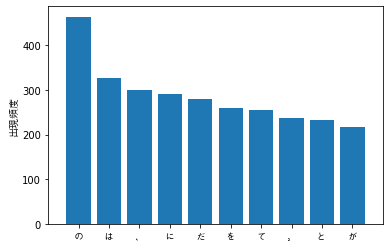

In [104]:
words_with_neko = []
for line_number, line in enumerate(mecabed_text):
    for index, morpheme in enumerate(line):
        if morpheme['base'] == '猫':
            words_with_neko.extend([w['base'] for w in line if w['base'] != '猫'])
            continue
            
create_chart(words_with_neko)

# 38. ヒストグラム

(array([1.105e+04, 9.700e+01, 3.100e+01, 1.700e+01, 8.000e+00, 5.000e+00,
        5.000e+00, 5.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 1.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

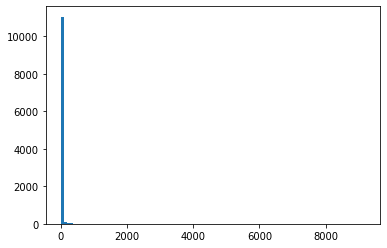

In [106]:
# 38
word_counts = pd.Series(words).value_counts()
plt.hist(word_counts, bins=100)

# 39. Zipfの法則

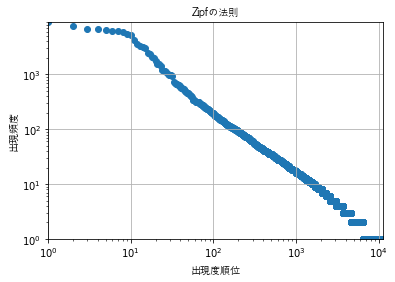

In [108]:
# 39
word_counts = pd.Series(words).value_counts()
# words = list(word_counts.index)[0:10]
counts = list(word_counts)

plt.scatter(
    range(1, len(counts) + 1),  # x軸：順位
    counts                      # y軸：出現頻度
)

plt.xlim(1, len(counts) + 1)
plt.ylim(1, counts[0])

plt.xscale('log')
plt.yscale('log')

plt.title("Zipfの法則", fontproperties=fp)
plt.xlabel("出現度順位", fontproperties=fp)
plt.ylabel("出現頻度", fontproperties=fp)

plt.grid(axis="both")

plt.show()
